In [29]:
from PIL import Image
import matplotlib.pyplot as plt

def getRed(redVal):
    return '#%02x%02x%02x' % (redVal, 0, 0)

def getGreen(greenVal):
    return '#%02x%02x%02x' % (0, greenVal, 0)

def getBlue(blueVal):
    return '#%02x%02x%02x' % (0, 0, blueVal)

# Create image with specific RGB value
image = Image.open('p01x8qtv.jpg')

In [22]:
# image.show(image)

histogram = image.histogram()
# Show len for color bar
print(len(histogram))

768


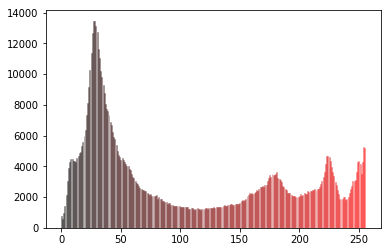

In [33]:
# Take only Red counts  
l1 = histogram[0:256]
plt.figure(0)

# R histogram
for i in range(0, 256):
    plt.bar(i, l1[i], color=getRed(i), edgecolor=getRed(i), alpha=0.3)
plt.show()

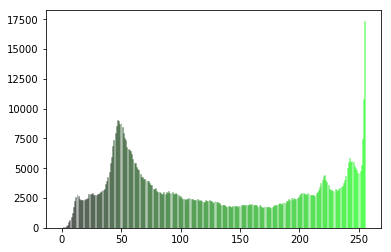

In [38]:
# Take only Green counts  
l2 = histogram[256:512]
plt.figure(1)

# G histogram
for i in range(0, 256):
    plt.bar(i, l2[i], color=getGreen(i), edgecolor=getGreen(i), alpha=0.3)
plt.show()

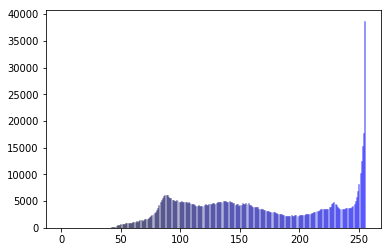

In [42]:
# Take only Blue counts  
l3 = histogram[512:768]
plt.figure(2)

# B histogram
for i in range(0, 256):
    plt.bar(i, l3[i], color=getBlue(i), edgecolor=getBlue(i), alpha=0.3)
plt.show()

In [48]:
# Histogram of gradient
from skimage.feature import hog
from skimage import data, exposure
from skimage.color import rgb2gray
from skimage.io import imshow

image = data.astronaut()
img_gray = rgb2gray(image)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


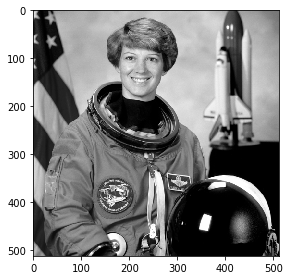

In [49]:
imshow(img_gray)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[0.14162206 0.1609864  0.07035796 ... 0.04703026 0.04393296 0.28259096]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


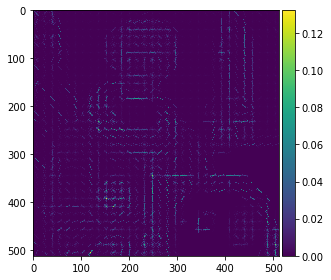

In [57]:
fd, hog_image = hog(img_gray, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualise=True)

print(fd)
imshow(hog_image)

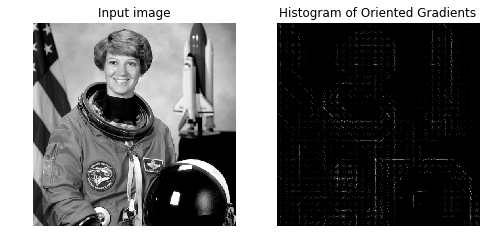

In [59]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(img_gray, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()